## Loading Data & Import Libraries

In [13]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import json

! cp ../input/indian-products-on-amazon/amazon_vfl_reviews.csv .
json_file = 'amazon_vfl_reviews.csv'
df = pd.read_csv(json_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782 entries, 0 to 2781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    2782 non-null   object
 1   name    2782 non-null   object
 2   date    2782 non-null   object
 3   rating  2782 non-null   int64 
 4   review  2778 non-null   object
dtypes: int64(1), object(4)
memory usage: 108.8+ KB


## Understadning, Wrangling and Cleaning Data

In [14]:
df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [15]:
for tp in df.groupby('name')['asin']:
    if len(tp[1].unique()) > 1:
        print(tp[0], tp[1].unique())

Cinthol-Lime-Soap-100-Pack ['B01CGESSG0' 'B07V6DQNP5']
Cinthol-Original-Soap-100g-Pack ['B07VB4H78J' 'B011HZ9NQS']
Dettol-Disinfectant-Cleaner-Home-Fresh ['B01CJUK8PU' 'B07QK29V9G']
Dettol-Liquid-Refill-Original-1500 ['B01LNA2MQK' 'B07YSHDZY1']
Fastrack-Casual-Analog-Blue-Watch-NK3124SL02 ['B01GDWNV68' 'B00MIFJMZE']
Godrej-Security-Solutions-SEEC9060-Electronic ['B07S55SML2' 'B00PVUAJDW']
Himalaya-4003F-Baby-Lotion-400ml ['B01IEO84OM' 'B003OPTXW4']
Himalaya-Baby-Shampoo-400-ml ['B008YD5500' 'B075B7WDJY']
Himalaya-Moisturizing-Aloe-Vera-200ml ['B074M3Z6Q5' 'B00H5NMNXC']
MYSORE-SANDAL-Mysore-Sandal-Talcum ['B07MVQDD4G' 'B002ZVK88G']
Mamaearth-Face-Wash-100-ml ['B082FL9GB6' 'B089W938BR']
Mamaearth-Natural-Turmeric-Saffron-brightning ['B082NWX7JC' 'B07Y4ZGYL9']
Mamaearth-Percent-Natural-Berry-Toothpaste ['B07BGT4J55' 'B07FPV716J']
Mysore-Sandal-Jasmine-Rose-Soap ['B00N469044' 'B00MGGLZUU']
Patanjali-Kanti-Natural-Cleanser-Shampoo ['B0818ZYVH1' 'B00R60PBTC']
Patanjali-Saundarya-Aloe-Vera-15

## `rating`
Finding out the distribution of ratings.

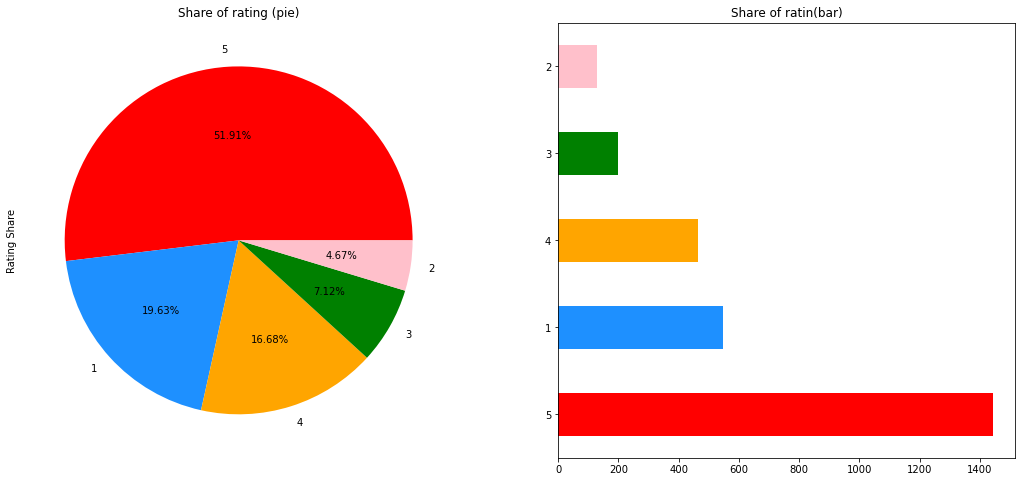

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
cs = ['r', 'dodgerblue', 'orange', 'green', 'pink']
df['rating'].value_counts().plot(kind='pie', autopct='%2.2f%%', ax=ax[0], colors=cs)
df['rating'].value_counts().plot(kind='barh', ax=ax[1], color=cs)
ax[0].set_title('Share of rating (pie)')
ax[0].set_ylabel('Rating Share')
ax[1].set_title('Share of ratin(bar)')
plt.show()

## `review`

Replacing the NaN-valued review with a word such as 'NULL'.

In [17]:
df[df.review.isna()]

,asin,name,date,rating,review
2248,B01GCETOCW,Tata-Tea-Gold-500g,2018-03-03,4,NaN
2258,B01GCETOCW,Tata-Tea-Gold-500g,2018-03-03,4,NaN
2631,B07J2MQNW3,Mysore-Sandal-Bathing-Soap-125g,2020-05-22,4,NaN
2641,B07J2MQNW3,Mysore-Sandal-Bathing-Soap-125g,2020-05-22,4,NaN


In [18]:
# replace NaN-valued review with word NULL
df.fillna({'review': 'NULL'}, inplace=True)

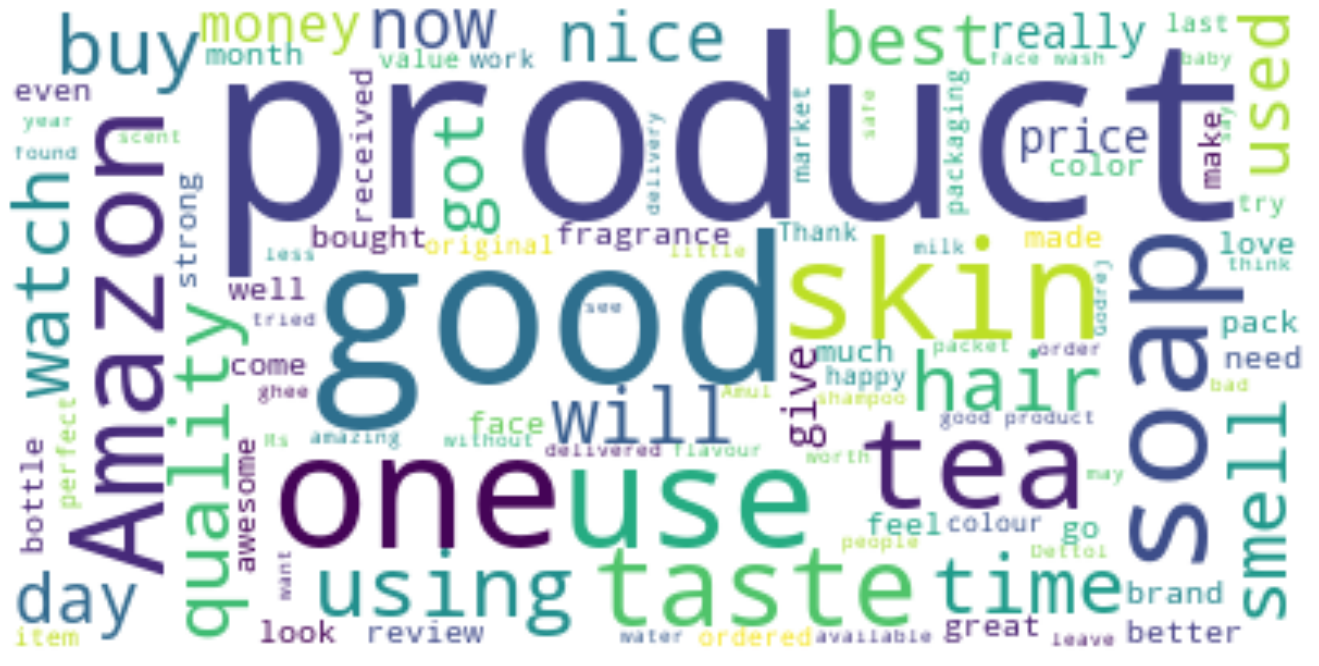

In [19]:
from wordcloud import WordCloud
import os
from PIL import Image
import urllib
    
text = ' '.join(str(t) for t in df.review)
wc = WordCloud(max_words=100, background_color='white', 
              ).generate(text)

plt.figure(figsize=(24, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Bayes Model

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


class Bayes:
    def _pipeline(self, df):
        cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        review = df[['review']]
        Xtrain, Xtest, ytrain, ytest = train_test_split(review, df.rating, random_state=2)
        cv.fit(pd.concat([Xtrain.review, Xtest.review]))
        Xtrain = cv.transform(Xtrain.review)
        Xtest  = cv.transform(Xtest.review)

        model = MultinomialNB()
        model.fit(Xtrain, ytrain)
        
        ypred = model.predict(Xtest)
        print("Bayes model accuracy score: ", accuracy_score(ytest, ypred))
#         print("Bayes model f1_score: ", f1_score(ytest, ypred))
                             
Bayes()._pipeline(df)

Bayes model accuracy score:  0.7916666666666666


This simple Bayes model achieved 79.2% accuracy on ratings.

# XGBoost

In [21]:
from xgboost import XGBClassifier

class Xgb:
    def _pipeline(self, df):
        cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        review = df[['review']]
        Xtrain, Xtest, ytrain, ytest = train_test_split(review, df.rating, random_state=2)
        cv.fit(pd.concat([Xtrain.review, Xtest.review]))
        Xtrain = cv.transform(Xtrain.review)
        Xtest  = cv.transform(Xtest.review)

        model = XGBClassifier()
        model.fit(Xtrain, ytrain)
        
        ypred = model.predict(Xtest)
        print("Xgboost classifier accuracy score: ", accuracy_score(ytest, ypred))
                             
Xgb()._pipeline(df)

Xgboost classifier accuracy score:  0.8390804597701149


Xgboost classifier works better, the accuracy score is improved to 83.9%.

# CNN

In [22]:
### import keras 
from keras import layers, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model, load_model
from keras.layers import Flatten, Dense, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import gensim.downloader as api
import logging
import math
# from tqdm.notebook import tqdm
# import tensorflow_hub as hub

class Classifier():
  def __init__(self):
    self.train = None
    self.test = None 
    self.model = None
    
  def load_data(self, df):
      """ Load train, test csv files and return pandas.DataFrame
      """
      self.train, self.test = train_test_split(df, test_size=0.2)
      self.train.rename({'review': 'text', 'rating': 'target'}, axis='columns', inplace=True)
      self.test.rename({'review': 'text', 'rating': 'target'}, axis='columns', inplace=True)

  
  def save_predictions(self, y_preds):
      sub = pd.read_csv(f"sampleSubmission.csv")
      sub['Sentiment'] = y_preds 
      sub.to_csv(f"submission_{self.__class__.__name__}.csv", index=False)
      logging.info(f'Prediction exported to submission_{self.__class__.__name__}.csv')
  

class C_NN(Classifier):
    def __init__(self, max_features=10000, embed_size=128, max_len=300):
        self.max_features=max_features
        self.embed_size=embed_size
        self.max_len=max_len
    
    def tokenize_text(self, text_train, text_test):
        '''@para: max_features, the most commenly used words in data set
        @input are vector of text
        '''
        tokenizer = Tokenizer(num_words=self.max_features)
        text = pd.concat([text_train, text_test])
        tokenizer.fit_on_texts(text)

        sequence_train = tokenizer.texts_to_sequences(text_train)
        tokenized_train = pad_sequences(sequence_train, maxlen=self.max_len)
        logging.info('Train text tokeninzed')

        sequence_test = tokenizer.texts_to_sequences(text_test)
        tokenized_test = pad_sequences(sequence_test, maxlen=self.max_len)
        logging.info('Test text tokeninzed')
        return tokenized_train, tokenized_test, tokenizer
      
    def build_model(self, embed_matrix=[]):
        text_input = Input(shape=(self.max_len, ))
        embed_text = layers.Embedding(self.max_features, self.embed_size)(text_input)
        if len(embed_matrix) > 0:
            embed_text = layers.Embedding(self.max_features, self.embed_size, \
                                          weights=[embed_matrix], trainable=False)(text_input)
            
        branch_a = layers.Bidirectional(layers.GRU(32, return_sequences=True))(embed_text)
        branch_b = layers.GlobalMaxPool1D()(branch_a)

        x = layers.Dense(64, activation='relu')(branch_b)
        x = layers.Dropout(0.2)(x)

        x = layers.Dense(32, activation='relu')(branch_b)
        x = layers.Dropout(0.2)(x)
        branch_z = layers.Dense(6, activation='softmax')(x)
        
        model = Model(inputs=text_input, outputs=branch_z)
        self.model = model

        return model
        
    def embed_word_vector(self, word_index, model):
        glove = api.load(model)
        zeros = [0] * self.embed_size
        matrix = np.zeros((self.max_features, self.embed_size))
          
        for word, i in word_index.items(): 
            if i >= self.max_features or word not in glove: continue # matrix[0] is zeros, that's also why >= is here
            matrix[i] = glove[word]

        logging.info('Matrix with embedded word vector created')
        return matrix

    def run(self, x_train, y_train):
        checkpoint = ModelCheckpoint('weights_base_best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
        early = EarlyStopping(monitor="val_acc", mode="max", patience=3)

        self.model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
        X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=2020)
        BATCH_SIZE = max(16, 2 ** int(math.log(len(X_tra) / 100, 2)))
        logging.info(f"Batch size is set to {BATCH_SIZE}")
        history = self.model.fit(X_tra, y_tra, epochs=30, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), \
                              callbacks=[checkpoint, early], verbose=0)

        return history


c = C_NN(max_features=10000, embed_size=300, max_len=300)
c.load_data(df)  
labels = to_categorical(c.train.target, num_classes=6)
labels

vector_train, vector_test, tokenizer = c.tokenize_text(c.train.text, c.test.text)
embed = c.embed_word_vector(tokenizer.word_index, 'word2vec-google-news-300')
c.build_model(embed_matrix=embed)
c.run(vector_train, labels)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



Epoch 00001: val_acc improved from -inf to 0.56404, saving model to weights_base_best.hdf5

Epoch 00002: val_acc improved from 0.56404 to 0.63371, saving model to weights_base_best.hdf5

Epoch 00003: val_acc improved from 0.63371 to 0.65843, saving model to weights_base_best.hdf5

Epoch 00004: val_acc improved from 0.65843 to 0.66517, saving model to weights_base_best.hdf5

Epoch 00005: val_acc improved from 0.66517 to 0.71910, saving model to weights_base_best.hdf5

Epoch 00006: val_acc improved from 0.71910 to 0.74607, saving model to weights_base_best.hdf5

Epoch 00007: val_acc improved from 0.74607 to 0.75056, saving model to weights_base_best.hdf5

Epoch 00008: val_acc improved from 0.75056 to 0.77753, saving model to weights_base_best.hdf5

Epoch 00009: val_acc did not improve from 0.77753

Epoch 00010: val_acc improved from 0.77753 to 0.82022, saving model to weights_base_best.hdf5

Epoch 00011: val_acc did not improve from 0.82022

Epoch 00012: val_acc improved from 0.82022 to

In [23]:
model = load_model('weights_base_best.hdf5')
y_preds = model.predict(vector_test)
final = np.argmax(y_preds, axis=1)
print('CNN accuracy score is', accuracy_score(c.test.target, final))


CNN accuracy score is 0.8850987432675045


CNN improved the accuracy score from 0.839 to 0.885.
